# GAN with CelebA

### 1. Kaggel 데이터셋 다운로드

www.kaggle.com/

In [ ]:
# Google Colab에서 작업하기.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Kaggle API 키 설정
import os
os.makedirs('/root/.kaggel', exist_ok=True)

!mv kaggel.json /root/.kaggel/kaggel.json
!chmod 600 /root/.kaggel/kaggel.json

In [ ]:
!kaggel datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip

---

In [5]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# 1. 필요한 라이브러리 설치 (터미널에서 먼저 실행)
# pip install kaggle python-dotenv

In [ ]:
from dotenv import load_dotenv

import os
load_dotenv()


# 환경변수에서 값 가져오기
kaggle_username = os.getenv('KAGGLE_USERNAME')
kaggle_key = os.getenv('KAGGLE_KEY')

if kaggle_username and kaggle_key:
    # Kaggle이 인식할 수 있도록 환경변수 설정
    os.environ['KAGGLE_USERNAME'] = kaggle_username
    os.environ['KAGGLE_KEY'] = kaggle_key
    print(f"✓ Kaggle 인증 정보 설정 완료")
    print(f"  - Username: {kaggle_username}")
else:
    print("⚠ .env 파일에서 KAGGLE_USERNAME 또는 KAGGLE_KEY를 찾을 수 없습니다.")
    print("  .env 파일 형식을 확인하세요:")


✓ Kaggle 인증 정보 설정 완료
  - Username: ohheungjae


In [7]:
import os
import shutil
from pathlib import Path

# 2. Kaggle 인증 설정
# Kaggle API는 홈 디렉토리의 .kaggle 폴더에서 kaggle.json을 찾습니다
kaggle_dir = Path.home() / '.kaggle'
kaggle_dir.mkdir(exist_ok=True)

In [8]:
kaggle_dir

WindowsPath('C:/Users/Playdata/.kaggle')

In [ ]:

# 현재 디렉토리의 kaggle.json을 .kaggle 폴더로 복사
current_kaggle_json = Path('kaggle.json')
target_kaggle_json = kaggle_dir / 'kaggle.json'

if current_kaggle_json.exists():
    shutil.copy(current_kaggle_json, target_kaggle_json)
    print(f"✓ kaggle.json 복사 완료: {target_kaggle_json}")
    
    # Windows에서는 chmod가 필요없지만, 파일 권한 확인
    if os.name != 'nt':  # Windows가 아닌 경우
        os.chmod(target_kaggle_json, 00600)
else:
    print(f"⚠ kaggle.json 파일을 찾을 수 없습니다: {current_kaggle_json}")

In [9]:
# 3. 데이터셋 다운로드
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other




  0%|          | 0.00/1.33G [00:00<?, ?B/s]
  9%|▉         | 121M/1.33G [00:00<00:01, 1.22GB/s]
 18%|█▊        | 246M/1.33G [00:00<00:00, 1.26GB/s]
 27%|██▋       | 373M/1.33G [00:00<00:00, 1.29GB/s]
 37%|███▋      | 497M/1.33G [00:00<00:00, 1.08GB/s]
 44%|████▍     | 604M/1.33G [00:00<00:00, 817MB/s] 
 54%|█████▎    | 730M/1.33G [00:00<00:00, 937MB/s]
 63%|██████▎   | 852M/1.33G [00:00<00:00, 1.03GB/s]
 72%|███████▏  | 984M/1.33G [00:00<00:00, 1.11GB/s]
 82%|████████▏ | 1.09G/1.33G [00:01<00:00, 1.17GB/s]
 90%|█████████ | 1.20G/1.33G [00:01<00:00, 956MB/s] 
100%|██████████| 1.33G/1.33G [00:01<00:00, 1.05GB/s]


In [10]:
# 4. 압축 해제, Windows에서는 Python의 zipfile 모듈 사용 권장
import zipfile
from pathlib import Path

zip_file = 'celeba-dataset.zip'

if Path(zip_file).exists():
    print("압축 해제 중...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('.')
    print("✓ 압축 해제 완료!")
    
    # 압축 해제된 파일 확인
    extracted_files = list(Path('.').glob('*'))
    print(f"\n압축 해제된 파일/폴더 목록:")
    for f in extracted_files[:10]:  # 처음 10개만 표시
        print(f"  - {f.name}")
else:
    print(f"⚠ {zip_file} 파일을 찾을 수 없습니다.")


압축 해제 중...
✓ 압축 해제 완료!

압축 해제된 파일/폴더 목록:
  - 01_VAE.ipynb
  - 02_GAN.ipynb
  - celeba-dataset.zip
  - dataset
  - digit7_sample_0.png
  - digit7_sample_1.png
  - digit7_sample_2.png
  - digit9_sample_0.png
  - digit9_sample_1.png
  - digit9_sample_2.png


---
## 로컬 환경 설정 요약

### ✅ Kaggle API 올바른 사용법:
1. **kaggle.json 위치**: `C:\Users\<사용자명>\.kaggle\kaggle.json`
2. **환경변수 방식 (선택사항)**: 
   - `KAGGLE_USERNAME`과 `KAGGLE_KEY`를 각각 환경변수로 설정
   - `.env` 파일에 저장하려면:
     ```
     KAGGLE_USERNAME=my_name
     KAGGLE_KEY=my_kaggle_api_key
     ```

### 📝 .env 파일 사용 방법 (대안):
```python
from dotenv import load_dotenv
import os

load_dotenv()  # True 반환 = .env 파일 로드 성공
username = os.getenv('KAGGLE_USERNAME')
key = os.getenv('KAGGLE_KEY')

# 환경변수로 설정
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = key
```

### ⚠️ 주의사항:
- `.env`에 `KAGGLE_API_KEY={...}` 형식은 **비표준**입니다
- Kaggle은 `kaggle.json` 파일을 찾거나, `KAGGLE_USERNAME`과 `KAGGLE_KEY` 환경변수를 찾습니다
- **권장**: `kaggle.json`을 `~/.kaggle/` 폴더에 두는 것이 가장 간단합니다


### 대안: .env 파일로 Kaggle 인증하기 (선택사항)

만약 `.env` 파일을 사용하고 싶다면 아래 방법을 사용하세요:


In [11]:
# local 에서 작업하기.

import glob

images = glob.glob('./img_align_celeba/img_align_celeba/*.jpg')
print(len(images))

202599


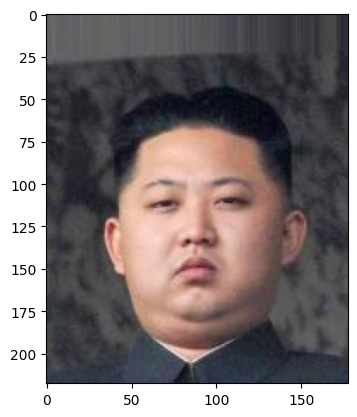

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("./img_align_celeba/img_align_celeba/200045.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/000564.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/188076.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/077888.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/201122.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/201805.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/009600.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/188105.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/193035.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/201675.jpg")
image = Image.open("./img_align_celeba/img_align_celeba/008104.jpg")
plt.imshow(image)

In [15]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
# 09_multi-model\05_gan\img_align_celeba

In [18]:
dataset = ImageFolder(root='./img_align_celeba', transform=transform)

data_loader = DataLoader(
    dataset=dataset,
    batch_size=128,
    shuffle=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..1.0].


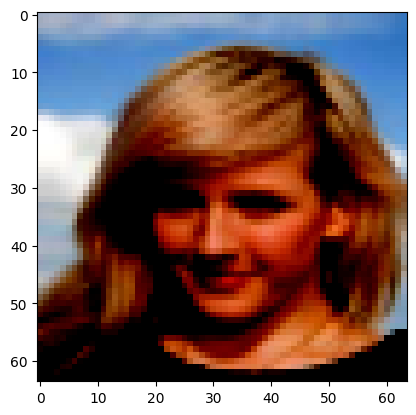

In [19]:
import numpy as np

iter_data = iter(data_loader)
img, label = next(iter(iter_data))

img = img[15].numpy()
plt.imshow(np.transpose(img, (1, 2, 0)))

### 3. GAN 모델 구성

In [20]:
import torch.nn as nn


In [21]:
# Generator
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    self.gen = nn.Sequential(
        nn.ConvTranspose2d(100, 512, kernel_size=4, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(),

        nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(),

        nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
        nn.Tanh(),
    )

  def forward(self, x):
    return self.gen(x)

In [22]:
# Discriminator
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.disc = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2),

        nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2),

        nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2),

        nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2),

        nn.Conv2d(512, 1, kernel_size=4),
        nn.Sigmoid(),
    )

  def forward(self, x):
    return self.disc(x)

### 모델 학습

In [24]:
def weights_init(m):
    classname = type(m).__name__
    
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)

    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [25]:
import torch
import tqdm
from torch.optim.adam import Adam

device = 'cuda' if torch.cuda.is_available() else 'cpu'

G = Generator().to(device)
D = Discriminator().to(device)

G.apply(weights_init)
D.apply(weights_init)

G_optim = Adam(G.parameters(), lr=0.001, betas=(0.5, 0.999))
D_optim = Adam(D.parameters(), lr=0.001, betas=(0.5, 0.999))

In [26]:
for epoch in range(20):
  iterator = tqdm.tqdm(enumerate(data_loader), total=len(data_loader))

  for idx, data in iterator:
    D_optim.zero_grad()
    label = torch.ones_like(data[1], dtype=torch.float32).to(device)
    label_fake = torch.zeros_like(data[1], dtype=torch.float32).to(device)

    real = D(data[0].to(device))
    D_loss_real = nn.BCELoss()(torch.squeeze(real), label)
    D_loss_real.backward()

    noise = torch.randn(label.shape[0], 100, 1, 1, device=device)
    fake = G(noise)
    output = D(fake.detach())
    D_loss_fake = nn.BCELoss()(torch.squeeze(output), label_fake)
    D_loss_fake.backward()

    D_loss = D_loss_real + D_loss_fake
    D_optim.step()

    G_optim.zero_grad()
    output = D(fake)
    G_loss = nn.BCELoss()(torch.squeeze(output), label)
    G_loss.backward()
    G_optim.step()

    iterator.set_description(f"Epoch: {epoch} | D_loss {D_loss}, G_loss {G_loss}")

  torch.save(G.state_dict(), './generator.pt')
  torch.save(D.state_dict(), './discriminator.pt')

Epoch: 0 | D_loss 1.0912127494812012, G_loss 2.0597898960113525: 100%|██████████| 1583/1583 [1:55:07<00:00,  4.36s/it]
Epoch: 1 | D_loss 0.9923701882362366, G_loss 2.34519100189209:  56%|█████▌    | 889/1583 [43:00<46:39,  4.03s/it]    

: 

In [ ]:
with torch.no_grad():
    G.load_state_dict(torch.load('./generator.pt'))
    noise = torch.randn(1, 100, 1, 1).to(device)
    img = G(noise).squeeze()
    img = img.permute(1, 2, 0).cpu().numpy()
    plt.imshow(img)